# リセットのフレームデータの平均をとる


In [1]:
import glob
import os
from fits_reader import fits_reader
import numpy as np
import importlib
import matplotlib.pyplot as plt
importlib.reload(fits_reader)
# %matplotlib notebook
# /Volumes/ciber2/Data/WSMR2021May/ambience/May19/frames
home_directory = os.environ['HOME']
season_name = "/WSMR2021May"
# experiment_name = "/ambience/May19"
experiment_name = "/abs_calib/NIR"
experiment_directory = home_directory + season_name + experiment_name
# chs = ["ch3"]
chs = ["ch1","ch2","ch3"]

plot_data_set = {}
plot_data_set_std= {}
for ch in chs:
    print(ch)
    folders = glob.glob(experiment_directory+"/frames/"+ ch + "/*")
    mask,_ = fits_reader.loadMask(ch)
    fits_reset = fits_reader.getResetFits(folders) 
#     fits_after_reset = fitsReader.getFitsAfterReset(folders)
    data_set = fits_reader.getFitsDataSet(fits_reset[:20])  + mask
    plot_data_set[ch] = np.average(data_set ,axis = 0)
    plot_data_set_std[ch] = np.std(data_set ,axis = 0)
#     break
    

ch1
ch2
ch3


# data map 

this is  ch1
this is  ch2
this is  ch3


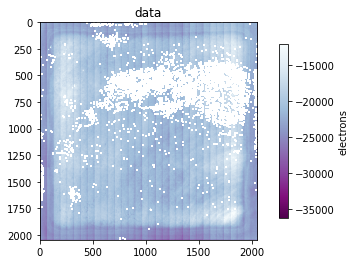

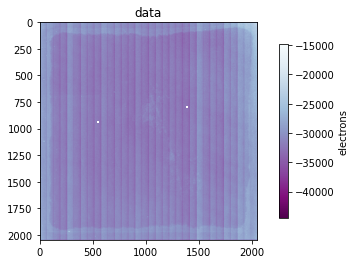

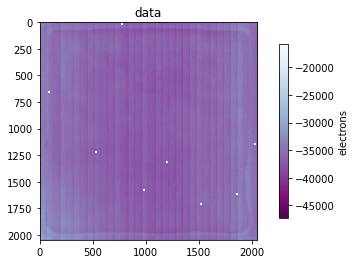

In [2]:

figs,axs = {},{}
def drawMap(fig,ax,data,title,vmin,vmax):
    
    im = ax.imshow(data,vmin=vmin,vmax=vmax, cmap=plt.cm.BuPu_r)
    cbar = fig.colorbar(im,ax = ax,shrink=0.8)
    cbar.set_label('electrons')
    ax.set_title(title)
# ch_gain = {"ch1":10,"ch2":100,"ch3":100000}
for ch in chs:
    print("this is ",ch)
    figs[ch],axs[ch] = plt.subplots()
    figs[ch].set_size_inches(8, 4)
    figs[ch].subplots_adjust(wspace=0.4)
    
    vmin = np.nanmin(plot_data_set[ch])
    vmax = np.nanmin(plot_data_set[ch])/3
#     vmax = np.nanmax(plot_data_set[ch])/ch_gain[ch]
    drawMap(figs[ch],axs[ch],plot_data_set[ch],"data",vmin=vmin,vmax=vmax)
plt.show()

# STD map

this is  ch1
this is  ch2
this is  ch3


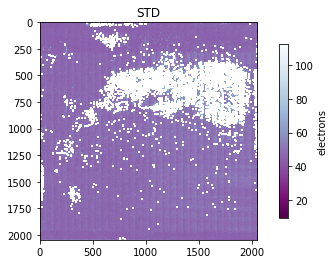

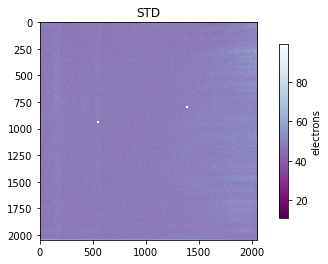

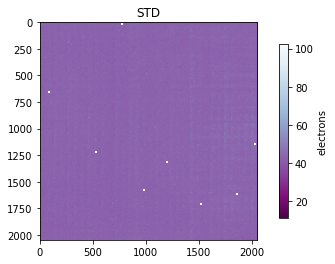

In [3]:

figs,axs = {},{}
# def drawMap(fig,ax,data,title,vmin,vmax):
    
#     im = ax.imshow(data,vmin=vmin,vmax=vmax, cmap=plt.cm.BuPu_r)
#     cbar = fig.colorbar(im,ax = ax,shrink=0.8)
#     cbar.set_label('eps')
#     ax.set_title(title)
    
for ch in chs:
    print("this is ",ch)
    figs[ch],axs[ch] = plt.subplots()
    figs[ch].set_size_inches(8, 4)
    figs[ch].subplots_adjust(wspace=0.4)
    vmin,vmax = None,np.nanmax(plot_data_set_std[ch])/10
    drawMap(figs[ch],axs[ch],plot_data_set_std[ch],"STD",vmin=vmin,vmax=vmax)
plt.show()

# save fits data

In [15]:
for ch in chs:
    f = './reset_image/'+ ch+'_reset.fits'

    fitsReader.saveFits(plot_data_set[ch],f)